<a href="https://colab.research.google.com/github/AaronARdz/TextDataVisualization/blob/main/large_numbers_rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# the law of great numbers
import numpy as np
import matplotlib.pyplot as plt

population_size = 2.3e5 #scientific notation

sample_size = 50
number_of_samples = 500

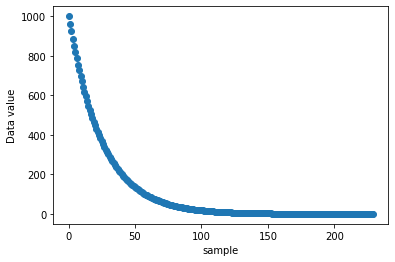

In [ ]:
# Generate the population of numbers
# Scale log up (logspace), scale log down()
population = 1 / np.logspace(np.log10(.001),np.log10(10),int(population_size))

# true mean
trueMean = np.mean(population)
# plot only every 1000 
skip = int(1e3)
plt.plot(population[::skip],'o')

plt.xlabel('sample')
plt.ylabel('Data value')
plt.show()

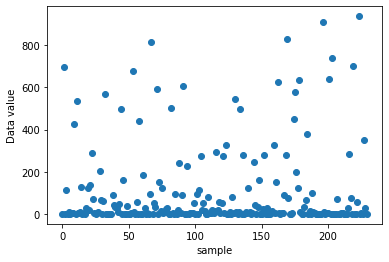

In [ ]:
# Shuffle the data
np.random.shuffle(population)

plt.plot(population[::skip],'o')

plt.xlabel('sample')
plt.ylabel('Data value')
plt.show()

In [ ]:
# Monte Carlo Sampling
samplemeans = np.zeros(number_of_samples)

for expi in range(number_of_samples):
  randsample = np.random.choice(population,size=sample_size)
  samplemeans[expi] = np.mean(randsample)



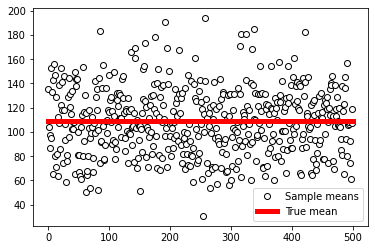

In [ ]:
plt.plot(samplemeans,'ko',markerfacecolor='w',label='Sample means')
plt.plot([0,number_of_samples],[trueMean,trueMean],'r', linewidth=5, label='True mean')

plt.legend()
plt.show()


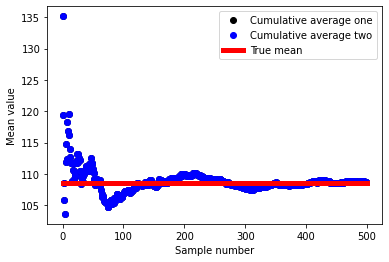

In [ ]:
# cumulative average
cumave = np.zeros(number_of_samples)
for i in range(number_of_samples):
  cumave[i] = np.mean(samplemeans[:i+1])

cumave2 = np.cumsum(samplemeans) / np.arange(1,number_of_samples+1)

plt.plot(cumave,'ko',label='Cumulative average one')
plt.plot(cumave2,'bo',label='Cumulative average two')
plt.plot([0,number_of_samples],[trueMean,trueMean],'r', linewidth=5, label='True mean')
plt.xlabel('Sample number')
plt.ylabel('Mean value')
plt.legend()
plt.show()

plt.show()
# # cumulative sum
# np.cumsum(samplemeans)

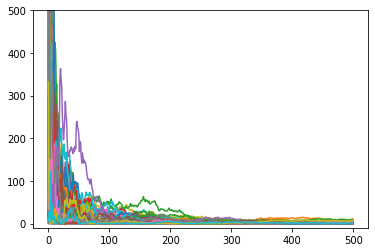

In [ ]:
number_of_meta_samples = 100

cumaves = np.zeros((number_of_meta_samples,number_of_samples))
allsamplemeans = np.zeros((number_of_meta_samples,number_of_samples))

for metai in range(number_of_meta_samples):
  for expi in range(number_of_samples):
    randsample = np.random.choice(population,size=sample_size)
    samplemeans[expi] = np.mean(randsample)

  # now get the cumulative average
  tmp = np.cumsum(samplemeans) / np.arange(1,number_of_samples+1)
  cumaves[metai,:] = (tmp - trueMean)**2
  # store the samplemeans
  allsamplemeans[metai,:] = samplemeans

# plot
plt.plot(cumaves.T) # matrix transpose
plt.ylim([-10,500])
plt.show()


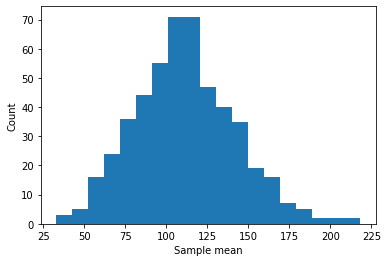

In [ ]:
plt.hist(samplemeans,bins='fd') #Freedman-Diaconis
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.show()

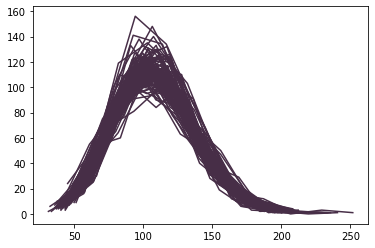

In [ ]:
nbins = 40
for i in range(number_of_meta_samples):
  y,x  = np.histogram(allsamplemeans[i,:])
  x = (x[1:]+x[:-1]) / 2
  plt.plot(x,y,color=[.28,.18,.28])

plt.show()